In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [20]:
torch.manual_seed(1)
X = torch.randn(100, 1)*10
y = X + 7.5*torch.randn(100, 1)

Text(0, 0.5, 'y')

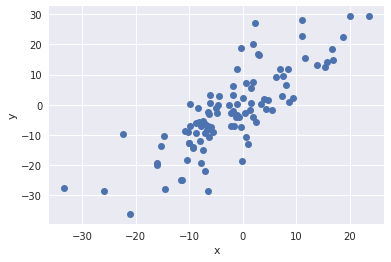

In [22]:
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [23]:
class LR(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [24]:
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [25]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [26]:
def fit(plot=True, title="Fit"):
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1+b1
    if plot:
        plt.title(title)
        plt.plot(x1, y1, 'r')
        plt.scatter(X, y)

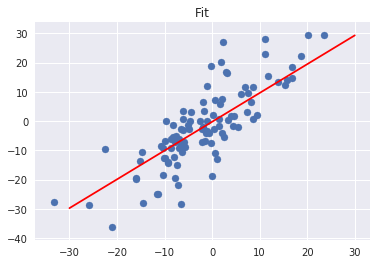

In [27]:
fit()

# Optmization

In [28]:
criterion = torch.nn.MSELoss()#Mean square error
learning_rate=0.01
optmizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    
    if i%5==0:
        print("epochs {} - loss {}".format(i, loss.item()))
    
    losses.append(loss)
    #reset the gradient value
    optmizer.zero_grad()
    #calc the derivative of the tangent
    loss.backward()
    #optimize the loss
    optmizer.step()

epochs 0 - loss 64.50814056396484
epochs 5 - loss 64.0948257446289
epochs 10 - loss 63.761959075927734
epochs 15 - loss 63.49386978149414
epochs 20 - loss 63.27793884277344
epochs 25 - loss 63.10400390625
epochs 30 - loss 62.96389389038086
epochs 35 - loss 62.851016998291016
epochs 40 - loss 62.76007843017578
epochs 45 - loss 62.68680953979492
epochs 50 - loss 62.62777328491211
epochs 55 - loss 62.5802001953125
epochs 60 - loss 62.541866302490234
epochs 65 - loss 62.51096725463867
epochs 70 - loss 62.48606491088867
epochs 75 - loss 62.46599197387695
epochs 80 - loss 62.44981002807617
epochs 85 - loss 62.436763763427734
epochs 90 - loss 62.426246643066406
epochs 95 - loss 62.41776657104492


Text(0.5, 0, 'epoch')

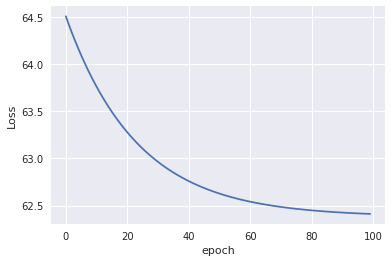

In [30]:
#visualize the gradient descent convergence
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

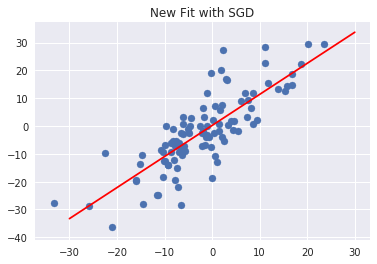

In [31]:
fit(title="New Fit with SGD")